## Overview 

Zomato stands out as a top-notch online food delivery application, offering users comprehensive ratings and reviews for restaurants across India. These reviews and ratings play a pivotal role in assessing a restaurant's quality.

To delve into this further, we'll analyze real-time data featuring various factors users typically consider when evaluating a restaurant. Our focus will be on Bangalore City for this examination.

The primary goal is to gain insights from the Zomato dataset, understanding the dynamics influencing the establishment of diverse restaurant types in different areas of Bengaluru. With over 12,000 restaurants serving a global array of dishes, Bengaluru, as a city, continues to witness new restaurant openings regularly. Despite the growing demand, new establishments face challenges competing with well-established counterparts, often offering similar cuisines.

Given Bengaluru's status as India's IT capital, a considerable portion of the population relies on restaurant food due to time constraints. As the restaurant industry experiences ongoing growth, it becomes crucial to examine the local demography. Understanding preferences, such as the popularity of vegetarian food in a specific locality or the presence of particular communities like Jain, Marwaris, and Gujaratis—who predominantly follow a vegetarian diet—can provide valuable insights.

To conduct such analyses, we'll explore data points like:
- Restaurant location
- Approximate food prices
- Presence of theme-based restaurants
- Localities with the highest number of restaurants serving specific cuisines
- Identifying the culinary preferences of residents
- Recognizing neighborhoods renowned for specific types of cuisine.

By studying these factors, we aim to uncover patterns and trends, facilitating a better understanding of the restaurant landscape in Bengaluru.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np


###  1. Exploratory Data Analysis:

**1.1 Load the Zomato dataset and understand its structure.**

In [3]:
# Load the Zomato dataset
zomato_data = pd.read_csv('/kaggle/input/zomato-bangalore-restaurants/zomato.csv')  

# Display the first few rows of the dataset
print("First few rows of the dataset:")
zomato_data.sample(15)

First few rows of the dataset:


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
43881,https://www.zomato.com/bangalore/slounge-lemon...,"Lemon Tree Premier, 2/1, St. Johns Road, Ulsoo...",Slounge - Lemon Tree Premier,No,Yes,4.0 /5,64,080 44802005\n+91 9986771761,Ulsoor,Lounge,Pool Table,Finger Food,"1,500","[('Rated 5.0', 'RATED\n first time stay at th...",[],Drinks & nightlife,MG Road
3485,https://www.zomato.com/bangalore/jcubez-banash...,"1431, 22nd Cross, Near BDA Complex, 2nd Stage,...",Jcubez,No,Yes,3.8/5,977,+91 9740425235\r\n+91 8746006497,Banashankari,Lounge,"Beer, Chicken Wings, Chilli Chicken, Onion Rin...",Finger Food,"1,300","[('Rated 4.0', 'RATED\n Had been with friends...",[],Dine-out,Basavanagudi
27068,https://www.zomato.com/bangalore/shanthi-sagar...,"96, 60 Feet Road, Koramangala 6th Block, Banga...",Shanthi Sagar,Yes,No,3.1/5,8,+91 9916182663,Koramangala 6th Block,Quick Bites,NaN,South Indian,250,"[('Rated 3.0', ""RATED\n Not a great fan of Sa...",[],Delivery,Koramangala 4th Block
26837,https://www.zomato.com/bangalore/smallys-resto...,"75/2, 17th Main, Hosur Road, Koramangala 5th B...",Smally's Resto Cafe,Yes,Yes,4.2/5,1701,+91 7406772442\r\r\n+91 7406772332,Koramangala 5th Block,Cafe,"Burgers, Pasta, Chocolate Mousse, Potato Wedge...","Cafe, Italian, Burger, American, Steak",650,"[('Rated 4.0', 'RATED\n A small cosy cafe jus...","['Chicken Putins Stroganoff', 'Peri Peri Fries...",Delivery,Koramangala 4th Block
39299,https://www.zomato.com/bangalore/hotel-renowne...,"Opposite City Market Bus Stop, Bangalore, City...",Hotel Renowned,No,No,3.3 /5,5,+91 8123738173,City Market,Quick Bites,NaN,"North Indian, Biryani",200,"[('Rated 3.5', 'RATED\n No other place than d...",[],Dine-out,Lavelle Road
46292,https://www.zomato.com/bangalore/keventers-1-m...,"35, 8th Main Road,16th Cross, Malleshwaram, Ba...",Keventers,Yes,No,3.7 /5,104,080 48903200,Malleshwaram,"Beverage Shop, Dessert Parlor","Thick Shakes, Chocolate Hazelnut, Chocolate Or...","Beverages, Desserts, Ice Cream",400,"[('Rated 4.0', 'RATED\n Sip me baby, one more...",[],Delivery,Rajajinagar
9548,https://www.zomato.com/bangalore/delicious-mom...,"Shop 19/7, 7th Main, 19th Cross, BTM 2nd Stage...",Delicious Mom's Kitchen,No,No,NEW,0,+91 6202500859\r\n+91 9708037348,BTM,Quick Bites,NaN,"Bengali, North Indian",200,[],[],Delivery,BTM
50445,https://www.zomato.com/bangalore/just-bake-7-w...,"85, Ramdev Arcade, Hoskote Main Road, Kadugadi...",Just Bake,Yes,No,3.5 /5,11,+91 7204004720,Whitefield,Bakery,NaN,Bakery,400,"[('Rated 4.0', 'RATED\n Ordered a birthday ca...",[],Delivery,Whitefield
16567,https://www.zomato.com/bangalore/jfd-cafe-hsr?...,"1821, 24th Main Road, Vanganahalli, Sector 2, ...",JFD Cafe,Yes,No,2.8/5,37,+91 8884526272,HSR,Cafe,NaN,Cafe,400,"[('Rated 3.0', 'RATED\n Located on the 24th M...",[],Delivery,HSR
42738,https://www.zomato.com/bangalore/the-konkan-se...,"48/1, 1st Floor, St. Marks Road, Church Street...",The Konkan - Seafood Restaurant,Yes,Yes,4.4 /5,219,+91 9916100875\n+91 9986762579,St. Marks Road,Casual Dining,"Sea Food, Murgh Ghee Roast, Mocktails, Stuffed...","Seafood, Konkan, Mangalorean",850,"[('Rated 5.0', 'RATED\n If you are a costal a...",[],Delivery,MG Road


#### Data Dictionary

**url**: The URL of the restaurant on the Zomato website.

**address**: The physical address of the restaurant.

**name**: The name of the restaurant.

**online_order**: Indicates whether the restaurant accepts online orders (Yes/No).

**book_table**: Indicates whether the restaurant allows table booking (Yes/No).

**rate**: The average rating of the restaurant (in the format "X.X / 5.0").

**votes**: The number of votes received by the restaurant.

**phone**: Contact phone number(s) of the restaurant.

**location**: The area or locality where the restaurant is situated.

**rest_type**: The type or category of the restaurant (e.g., Casual Dining, Cafe).

**dish_liked**: Some dishes that are popular or liked at the restaurant.

**cuisines**: The types of cuisines offered by the restaurant.

**approx_cost(for two people)**: Approximate cost for two people to dine at the restaurant.

**reviews_list**: List of reviews and ratings given by customers.

**menu_item**: Menu items offered by the restaurant.

**listed_in(type)**: The type of service the restaurant is listed under (e.g., Dine-out).

**listed_in(city)**: The city or area where the restaurant is listed.

In [4]:
#checking the shape of dataset
zomato_data.shape

(51717, 17)

there are total 51717 samples with 17 features.

In [5]:
# Display basic information about the dataset
print("\nDataset Information:")
print(zomato_data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_l

since most of features in dataset are not in sutaible data type we need to convert them into sutaible data type 

In [6]:
# Display summary statistics of numerical features
print("\nSummary Statistics:")
zomato_data.describe()


Summary Statistics:


,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


**1.2 Data Cleaning**

Drop unnecessary columns

In [7]:

# List of unnecessary columns to drop
columns_to_drop = ['url', 'phone','menu_item']  # menu_item conatains empty lists,url and phone columns I think won't affect analysis or model building

# Drop the unnecessary columns
zomato_data = zomato_data.drop(columns=columns_to_drop)

# Display the first few rows of the cleaned dataset
print("First few rows of the cleaned dataset:")
zomato_data.head()

First few rows of the cleaned dataset:


,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


Renaming columns in more simplistic and understandable way 


In [8]:
# Dictionary to map old column names to new column names
column_name_mapping = {
    'address': 'restaurant_address',
    'name': 'restaurant_name',
    'online_order': 'online_orders',
    'book_table': 'book_table',
    'rate': 'rating',
    'votes': 'total_votes',
    'location': 'restaurant_location',
    'rest_type': 'restaurant_type',
    'dish_liked': 'popular_dishes',
    'cuisines': 'cuisine_types',
    'approx_cost(for two people)': 'cost_for_two',
    'reviews_list': 'customer_reviews',
    'listed_in(type)': 'restaurant_service',
    'listed_in(city)': 'restaurant_city'
}

# Rename the columns
zomato_data= zomato_data.rename(columns=column_name_mapping)

# Display the first few rows of the dataset with the renamed columns
print("First few rows of the dataset with renamed columns:")
zomato_data.sample(15)

First few rows of the dataset with renamed columns:


,restaurant_address,restaurant_name,online_orders,book_table,rating,total_votes,restaurant_location,restaurant_type,popular_dishes,cuisine_types,cost_for_two,customer_reviews,restaurant_service,restaurant_city
7459,"Plot 24-1, Ferns City Road, Doddanakundi, Oute...",Chikki's CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ©,Yes,No,NaN,0,Marathahalli,Quick Bites,NaN,"North Indian, Chinese, Mughlai",500,[],Delivery,Brookefield
31880,"13th Cross, Venkateswara Layout, Maruthi Nagar...",Paradise Food Court,No,No,NaN,0,BTM,Quick Bites,NaN,"North Indian, Chinese",400,[],Dine-out,Koramangala 5th Block
3658,"A.N Tower 9/4, Lalbagh Main Road Near Urvashi ...",New Ambur Biryani,No,No,NaN,0,Shanti Nagar,Quick Bites,NaN,Biryani,350,"[('Rated 5.0', 'RATED\n this was my regular p...",Dine-out,Basavanagudi
8623,"30, Koramangala 5th Block, Bangalore",Makers of Milkshakes,Yes,No,4.1/5,55,Koramangala 5th Block,Beverage Shop,"Vanilla Ice Cream, Chocolate Milkshake",Beverages,400,"[('Rated 5.0', 'RATED\n We order in from Make...",Delivery,BTM
6591,"16/3, Commissariat Road, Brigade Road, Bangalore",The Permit Room,No,No,4.5/5,1573,Brigade Road,"Casual Dining, Bar","Cocktails, Chicken Curry, Beer, Watermelon Moj...",South Indian,"1,500","[('Rated 4.0', 'RATED\n Been here sometime la...",Drinks & nightlife,Brigade Road
44125,"Narasipura Layout, Vidyaranyapura, Bangalore",Red Chillies Curries Point,Yes,No,NaN,0,Yelahanka,Quick Bites,NaN,Andhra,250,[],Delivery,New BEL Road
14984,"48, Triumph Towers, Church Street, Bangalore",Donne Biriyani Mane,Yes,No,3.5/5,62,Church Street,Quick Bites,"Donne Biryani, Mutton Biryani","Biryani, Kebab",400,"[('Rated 3.0', 'RATED\n Visited here after sh...",Delivery,Frazer Town
31833,"436, 5th Main Road, 6th Avenue Street, Teacher...",Fresh Kitchen,No,No,NaN,0,HSR,Quick Bites,NaN,"North Indian, Chinese",400,"[('Rated 1.0', ""RATED\n Pathetic place please...",Dine-out,Koramangala 5th Block
76,"49/1, Subbaraoshetty Road, Netkallappa Circle,...",Sri Guru Kottureshwara Davangere Benne Dosa,Yes,No,4.1/5,558,Basavanagudi,Quick Bites,"Benne Dosa, Mirchi Bajji, Filter Coffee, Poha,...",South Indian,150,"[('Rated 4.0', 'RATED\n My go-to benne dosa p...",Delivery,Banashankari
45334,"806/1, Rajeshwari Business chambers, New Thipp...",The Daily Dabba,No,No,NaN,0,Thippasandra,"Takeaway, Delivery",NaN,North Indian,250,[],Delivery,Old Airport Road


In [9]:
# csv_filename = '/kaggle/working/zomato_renamed_data.csv'
# zomato_data.to_csv(csv_filename, index=False)

In [10]:
zomato_data['total_votes'].min()

0

In [11]:
zomato_data['total_votes'].max()

16832

In [12]:
zomato_data['restaurant_location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan 

In [13]:
zomato_data['restaurant_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

In [14]:
zomato_data['cuisine_types'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [15]:
zomato_data['restaurant_service'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [16]:
zomato_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   restaurant_address   51717 non-null  object
 1   restaurant_name      51717 non-null  object
 2   online_orders        51717 non-null  object
 3   book_table           51717 non-null  object
 4   rating               43942 non-null  object
 5   total_votes          51717 non-null  int64 
 6   restaurant_location  51696 non-null  object
 7   restaurant_type      51490 non-null  object
 8   popular_dishes       23639 non-null  object
 9   cuisine_types        51672 non-null  object
 10  cost_for_two         51371 non-null  object
 11  customer_reviews     51717 non-null  object
 12  restaurant_service   51717 non-null  object
 13  restaurant_city      51717 non-null  object
dtypes: int64(1), object(13)
memory usage: 5.5+ MB


In [17]:
zomato_data.dtypes

restaurant_address     object
restaurant_name        object
online_orders          object
book_table             object
rating                 object
total_votes             int64
restaurant_location    object
restaurant_type        object
popular_dishes         object
cuisine_types          object
cost_for_two           object
customer_reviews       object
restaurant_service     object
restaurant_city        object
dtype: object

Convert feature columns data types in sutaible data types 


In [18]:
# Handle cost column 
zomato_data['cost_for_two'].unique()


array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

here we can see that data point is string type and some values like 5,000 6,000 have comma(,). we have to remove that ',' from the values and we have convert them into numeric type.

In [19]:
# Handle 'cost_for_two' column
zomato_data['cost_for_two'] = zomato_data['cost_for_two'].apply(lambda x: str(x).replace(',', '') if pd.notna(x) else x)
zomato_data['cost_for_two'] = pd.to_numeric(zomato_data['cost_for_two'], errors='coerce')

In [20]:
zomato_data['cost_for_two'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700.,   nan, 1400.,  180., 1350.,
       2200., 2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800.,
       3400.,   40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,
        469.,   70., 3200.,   60.,  560.,  240.,  360., 6000., 1050.,
       2300., 4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [21]:
count_cost = zomato_data['cost_for_two'].value_counts(dropna=False).to_dict()
print(count_cost)

{300.0: 7576, 400.0: 6562, 500.0: 4980, 200.0: 4857, 600.0: 3714, 250.0: 2959, 800.0: 2285, 150.0: 2066, 700.0: 1948, 350.0: 1763, 1000.0: 1637, 450.0: 1417, 100.0: 993, 1200.0: 993, 1500.0: 971, 650.0: 776, 550.0: 761, 750.0: 758, 900.0: 700, 1300.0: 516, 1100.0: 512, 1400.0: 473, 2000.0: 363, nan: 346, 1600.0: 266, 1700.0: 247, 1800.0: 203, 850.0: 166, 3000.0: 162, 2500.0: 146, 2200.0: 78, 1900.0: 70, 2100.0: 67, 950.0: 62, 2800.0: 45, 4000.0: 29, 3500.0: 25, 120.0: 24, 2400.0: 23, 180.0: 20, 1350.0: 18, 3400.0: 13, 2300.0: 11, 80.0: 10, 230.0: 10, 2600.0: 10, 1250.0: 9, 50.0: 8, 130.0: 8, 40.0: 8, 1650.0: 6, 1450.0: 5, 4100.0: 4, 330.0: 4, 199.0: 4, 1050.0: 4, 2700.0: 3, 70.0: 3, 6000.0: 2, 4500.0: 2, 3200.0: 2, 360.0: 2, 240.0: 2, 190.0: 2, 140.0: 2, 560.0: 1, 60.0: 1, 5000.0: 1, 3700.0: 1, 469.0: 1, 160.0: 1}


We have nan: 346 values and we also dont want to lose data, so to handle them we can use,

Use Advanced Imputation Techniques:

If you have a large dataset and want a more sophisticated approach, you can explore advanced imputation techniques such as K-Nearest Neighbors (KNN) imputation or using machine learning models for imputation.

In [22]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()
zomato_data['cost_for_two'] = imputer.fit_transform(zomato_data[['cost_for_two']])

In [23]:
count_cost = zomato_data['cost_for_two'].value_counts(dropna=False).to_dict()
print(count_cost)

{300.0: 7576, 400.0: 6562, 500.0: 4980, 200.0: 4857, 600.0: 3714, 250.0: 2959, 800.0: 2285, 150.0: 2066, 700.0: 1948, 350.0: 1763, 1000.0: 1637, 450.0: 1417, 100.0: 993, 1200.0: 993, 1500.0: 971, 650.0: 776, 550.0: 761, 750.0: 758, 900.0: 700, 1300.0: 516, 1100.0: 512, 1400.0: 473, 2000.0: 363, 555.4315664479959: 346, 1600.0: 266, 1700.0: 247, 1800.0: 203, 850.0: 166, 3000.0: 162, 2500.0: 146, 2200.0: 78, 1900.0: 70, 2100.0: 67, 950.0: 62, 2800.0: 45, 4000.0: 29, 3500.0: 25, 120.0: 24, 2400.0: 23, 180.0: 20, 1350.0: 18, 3400.0: 13, 2300.0: 11, 80.0: 10, 230.0: 10, 2600.0: 10, 1250.0: 9, 50.0: 8, 130.0: 8, 40.0: 8, 1650.0: 6, 1450.0: 5, 4100.0: 4, 330.0: 4, 199.0: 4, 1050.0: 4, 2700.0: 3, 70.0: 3, 6000.0: 2, 4500.0: 2, 3200.0: 2, 360.0: 2, 240.0: 2, 190.0: 2, 140.0: 2, 560.0: 1, 60.0: 1, 5000.0: 1, 3700.0: 1, 469.0: 1, 160.0: 1}


In [24]:
# Handle rating column 
zomato_data['rating'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [25]:
# Extract the numerical part from 'rating' column and convert to float
zomato_data['rating'] = zomato_data['rating'].str.extract('(\d+\.\d+)').astype(float)

# Display updated unique values
print("Updated unique values in 'rating' column:")
print(zomato_data['rating'].unique())

Updated unique values in 'rating' column:
[4.1 3.8 3.7 3.6 4.6 4.  4.2 3.9 3.1 3.  3.2 3.3 2.8 4.4 4.3 nan 2.9 3.5
 2.6 3.4 4.5 2.5 2.7 4.7 2.4 2.2 2.3 4.8 4.9 2.1 2.  1.8]


In [26]:
count_clean = zomato_data['rating'].value_counts(dropna=False).to_dict()
print(count_clean)

{nan: 10052, 3.9: 3972, 3.8: 3873, 3.7: 3821, 3.6: 3316, 4.0: 3183, 4.1: 2948, 3.5: 2784, 3.4: 2476, 3.3: 2310, 4.2: 2184, 3.2: 1873, 4.3: 1693, 3.1: 1561, 4.4: 1147, 3.0: 1023, 2.9: 802, 4.5: 656, 2.8: 600, 2.7: 307, 4.6: 300, 2.6: 260, 4.7: 167, 2.5: 101, 2.4: 70, 4.8: 66, 4.9: 55, 2.3: 51, 2.2: 26, 2.1: 24, 2.0: 11, 1.8: 5}


We have nan: 10052 values and we also dont want to lose data, so to handle them we can use,

Use Advanced Imputation Techniques:

If you have a large dataset and want a more sophisticated approach, you can explore advanced imputation techniques such as K-Nearest Neighbors (KNN) imputation or using machine learning models for imputation.



In [27]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()
zomato_data['rating'] = imputer.fit_transform(zomato_data[['rating']])


In [28]:
count= zomato_data['rating'].value_counts(dropna=False).to_dict()
print(count)

{3.700448817952718: 10052, 3.9: 3972, 3.8: 3873, 3.7: 3821, 3.6: 3316, 4.0: 3183, 4.1: 2948, 3.5: 2784, 3.4: 2476, 3.3: 2310, 4.2: 2184, 3.2: 1873, 4.3: 1693, 3.1: 1561, 4.4: 1147, 3.0: 1023, 2.9: 802, 4.5: 656, 2.8: 600, 2.7: 307, 4.6: 300, 2.6: 260, 4.7: 167, 2.5: 101, 2.4: 70, 4.8: 66, 4.9: 55, 2.3: 51, 2.2: 26, 2.1: 24, 2.0: 11, 1.8: 5}


In [29]:
import pandas as pd

# Assuming your DataFrame is named 'df'
nan_values = zomato_data.isnull().sum()

# Display NaN values in each column
print("NaN values in each column:")
print(nan_values)


NaN values in each column:
restaurant_address         0
restaurant_name            0
online_orders              0
book_table                 0
rating                     0
total_votes                0
restaurant_location       21
restaurant_type          227
popular_dishes         28078
cuisine_types             45
cost_for_two               0
customer_reviews           0
restaurant_service         0
restaurant_city            0
dtype: int64


In [30]:
# Fill missing values in specific columns with their respective strategies
zomato_data.fillna({
    'restaurant_location': zomato_data['restaurant_location'].mode()[0],
    'restaurant_type': 'Unknown', 
    'popular_dishes': 'Unknown',
    'cuisine_types': zomato_data['cuisine_types'].mode()[0]
}, inplace=True)

# Fill missing values in 'restaurant_location' with the mode
# Replace missing values in 'restaurant_type' with 'Unknown'
# Replace missing values in 'popular_dishes' with 'Unknown'
# Fill missing values in 'cuisine_types' with the mode


In [31]:

nan_values = zomato_data.isnull().sum()

# Display NaN values in each column
print("NaN values in each column:")
print(nan_values)

NaN values in each column:
restaurant_address     0
restaurant_name        0
online_orders          0
book_table             0
rating                 0
total_votes            0
restaurant_location    0
restaurant_type        0
popular_dishes         0
cuisine_types          0
cost_for_two           0
customer_reviews       0
restaurant_service     0
restaurant_city        0
dtype: int64


In [32]:
# Display the first few rows of the dataset with the renamed columns
print("First few rows of the dataset with renamed columns:")
zomato_data.head()

First few rows of the dataset with renamed columns:


,restaurant_address,restaurant_name,online_orders,book_table,rating,total_votes,restaurant_location,restaurant_type,popular_dishes,cuisine_types,cost_for_two,customer_reviews,restaurant_service,restaurant_city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


**1.3 Data Visualization**

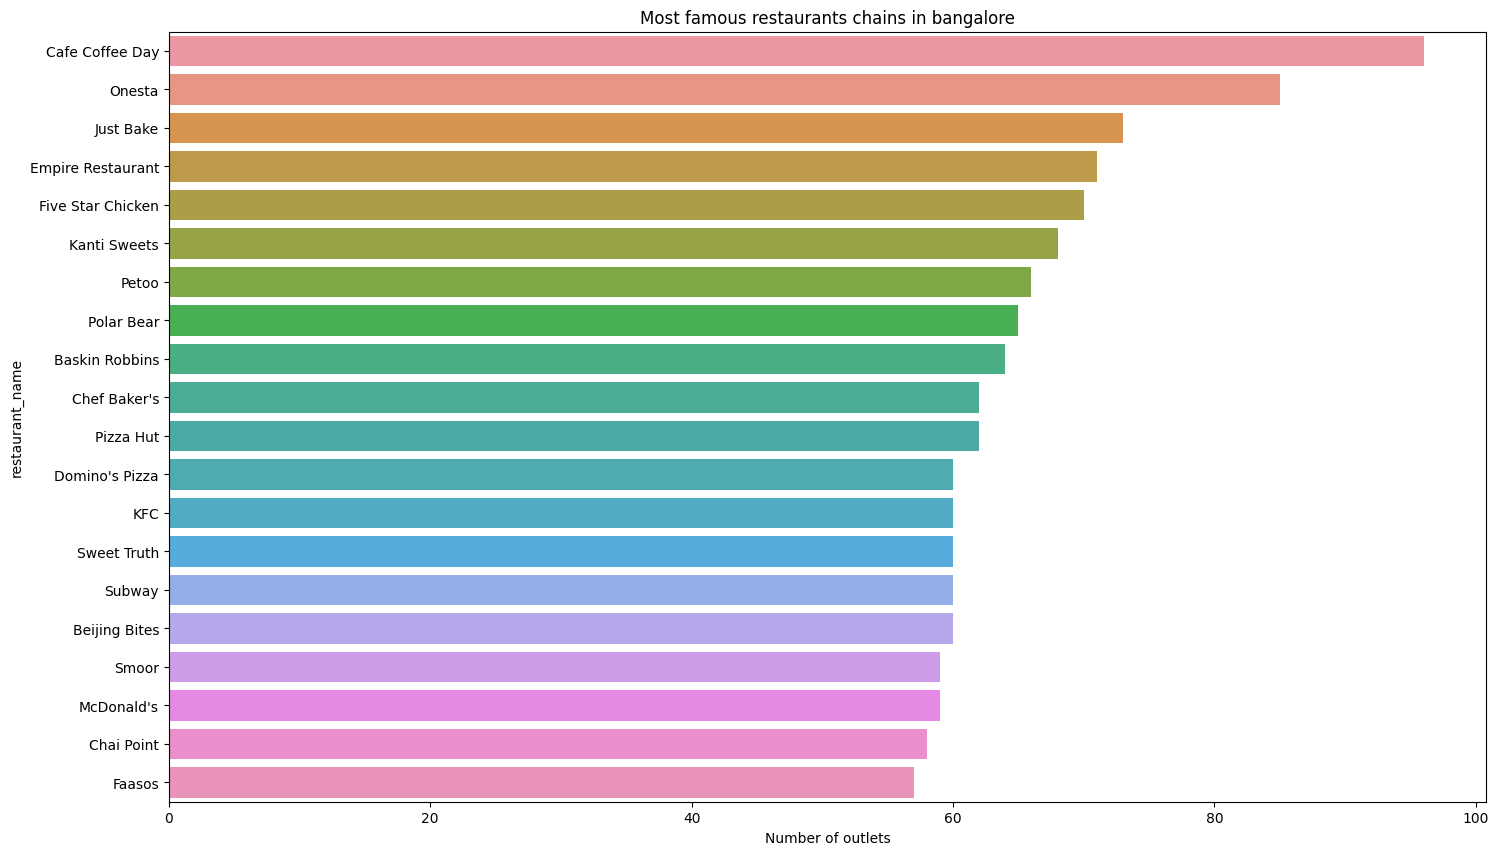

In [33]:
# Most famous restaurant chains in banaglore

plt.figure(figsize = (17,10))
chains = zomato_data['restaurant_name'].value_counts()[:20]
sns.barplot(x = chains, y=  chains.index)
plt.title('Most famous restaurants chains in bangalore')
plt.xlabel('Number of outlets')
plt.show()

**Insight: Cafe Coffee Day,Onesta ,Just Bake are most famous restaurants in terms of no. of outlets.**

In [34]:
import plotly.express as px

# Sort the dataframe by 'rating' in descending order
top_restaurants = zomato_data.sort_values(by='rating', ascending=False).head(20)

# Create an interactive bar chart
fig = px.bar(top_restaurants, x='rating', y='restaurant_name', text='rating', color='rating',
             labels={'restaurant_name': 'Restaurant Name', 'rating': 'Rating'},
             title='Top 20 Restaurants according to Rating in Bangalore',
             height=700, width=900)

# Customize the layout
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(xaxis=dict(title='Rating'), yaxis=dict(title='Restaurant Name'),
                  coloraxis=dict(colorbar=dict(title='Rating')))

# Show the plot
fig.show()


**Insight:  Belgian Waffle Factory, SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ, AB's - Absolute Barbecues, Punjab Grill, Byg Brewski Brewing Company,Asia Kitchen By Mainland China these are top 6 restaurant chains in terms of rating.**

In [35]:
import plotly.express as px

# Sort the dataframe by 'total_votes' in descending order and select the top 20
top_restaurants_votes = zomato_data.sort_values(by='total_votes', ascending=False).head(20)

# Create an interactive bar plot using Plotly Express
fig = px.bar(top_restaurants_votes, x='total_votes', y='restaurant_name',
             orientation='h', text='total_votes', color='total_votes',
             labels={'restaurant_name': 'Restaurant Name', 'total_votes': 'Number of Votes'},
             title='Top 20 Restaurants Based on Number of Votes')

# Customize the layout
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(xaxis=dict(title='Number of Votes'), yaxis=dict(title='Restaurant Name'),
                  coloraxis=dict(colorbar=dict(title='Number of Votes')))

# Show the interactive plot
fig.show()


**Insight: Byg Brewski Brewing Company, Toit, Truffles these are top 3 restaurant chains which are famous in terms of votes.**

In [ ]:
import plotly.express as px

# Create an interactive bar plot using Plotly Express
fig = px.histogram(zomato_data, x='book_table', color='book_table',
                   labels={'book_table': 'Book Table Facility'},
                   title='Number of Restaurants with and without Book Table Facility')

# Customize the layout
fig.update_layout(xaxis=dict(title='Book Table Facility'), yaxis=dict(title='Count'))

# Show the interactive plot
fig.show()


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



**Insight: Most restaurants(around 45k)  dont have book table facility**

In [ ]:
# Create an interactive bar plot for 'online_orders' column
fig = px.histogram(zomato_data, x='online_orders', color='online_orders',
                   labels={'online_orders': 'Online Orders Facility'},
                   title='Number of Restaurants with and without Online Orders Facility')

# Customize the layout
fig.update_layout(xaxis=dict(title='Online Orders Facility'), yaxis=dict(title='Count'))

# Show the interactive plot
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



**Insight: There is decent count of restaurants (around 31k) which have online orders facility**

In [38]:
import plotly.express as px

# Count the number of restaurants in each location
restaurant_counts = zomato_data['restaurant_location'].value_counts().reset_index()
restaurant_counts.columns = ['Location', 'Number of Restaurants']

# Select the top 15 locations with the highest number of restaurants
top_locations = restaurant_counts.head(15)

# Create an interactive bar plot
fig = px.bar(top_locations, x='Number of Restaurants', y='Location', orientation='h',
             labels={'Number of Restaurants': 'Number of Restaurants', 'Location': 'Location'},
             title='Top 15 Most Prominent Locations by Number of Restaurants')

# Customize the layout
fig.update_layout(xaxis=dict(title='Number of Restaurants'), yaxis=dict(title='Location'))

# Show the interactive plot
fig.show()


**Insight: BTM is most prominent location followed by HSR and Kormangla 5th Block in terms of no. of restaurants in that location.**

In [39]:
import plotly.express as px

# Count the number of each restaurant type
restaurant_type_counts = zomato_data['restaurant_type'].value_counts().reset_index()
restaurant_type_counts.columns = ['Restaurant Type', 'Count']

# Select the top 10 restaurant types
top_restaurant_types = restaurant_type_counts.head(10)

# Create an interactive bar plot
fig = px.bar(top_restaurant_types, x='Count', y='Restaurant Type', orientation='h',
             labels={'Count': 'Number of Restaurants', 'Restaurant Type': 'Restaurant Type'},
             title='Top 10 Restaurant Types')

# Customize the layout
fig.update_layout(xaxis=dict(title='Number of Restaurants'), yaxis=dict(title='Restaurant Type'))

# Show the interactive plot
fig.show()


**Insight: The restaurant landscape is dominated by Quick Bites and Casual Dining options, indicating a preference for convenient and relaxed dining experiences, while the presence of diverse establishments such as Cafes, Dessert Parlors, and Bars reflects a varied culinary scene catering to different preferences in the area.**

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


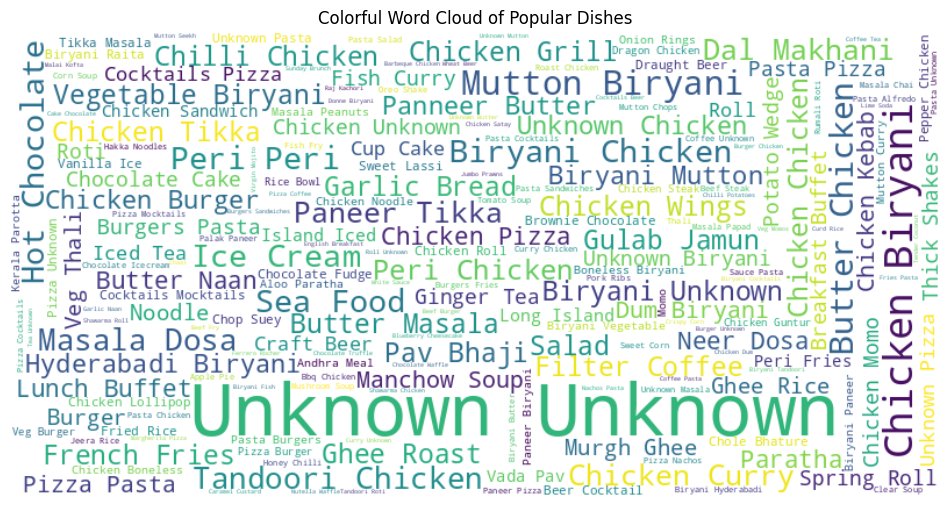

In [40]:
import plotly.express as px
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

# Download stopwords
import nltk
nltk.download('stopwords')

# Combine popular dishes text into a single string
popular_dishes_text = ' '.join(zomato_data['popular_dishes'].dropna())

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_text = ' '.join([word for word in popular_dishes_text.split() if word.lower() not in stop_words])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis',
                      contour_width=1, contour_color='black', max_words=200).generate(filtered_text)

# Display the word cloud using Matplotlib for customization
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Colorful Word Cloud of Popular Dishes')
plt.show()


In [41]:
popular_dishes_counts = zomato_data['popular_dishes'].value_counts().reset_index()
popular_dishes_counts.columns = ['Dish', 'Count']

# Exclude 'Unknown' category
popular_dishes_counts = popular_dishes_counts[popular_dishes_counts['Dish'] != 'Unknown']

# Select the top 10 popular dishes
top_10_dishes = popular_dishes_counts.head(10)

# Create an interactive bar plot
fig = px.bar(top_10_dishes, x='Count', y='Dish', orientation='h',
             labels={'Count': 'Number of Occurrences', 'Dish': 'Popular Dish'},
             title='Top 10 Most Popular Dishes (excluding Unknown)')

# Customize the layout
fig.update_layout(xaxis=dict(title='Number of Occurrences'), yaxis=dict(title='Popular Dish'))

# Show the interactive plot
fig.show()

**Insight : The top 10 popular dishes include Biryani, Chicken Biryani, Friendly Staff, Waffles, Paratha, Masala Dosa, Coffee, Rooftop Ambience, and Pizza, suggesting a diverse preference for both cuisine and ambiance in customer choices.**

In [42]:
import plotly.express as px

# Count the number of each cuisine type
cuisine_counts = zomato_data['cuisine_types'].value_counts().reset_index()
cuisine_counts.columns = ['Cuisine Type', 'Count']

# Select the top 10 cuisine types
top_cuisine_types = cuisine_counts.head(10)

# Create an interactive bar plot
fig = px.bar(top_cuisine_types, x='Count', y='Cuisine Type', orientation='h',
             labels={'Count': 'Number of Restaurants', 'Cuisine Type': 'Cuisine Type'},
             title='Top 10 Popular Cuisine Types')
             
# Customize the layout
fig.update_layout(xaxis=dict(title='Number of Restaurants'), yaxis=dict(title='Cuisine Type'))

# Show the interactive plot
fig.show()


**Insight : The dataset suggests that among popular cuisine types in restaurants, North Indian cuisine holds the highest count, followed by North Indian combined with Chinese, and South Indian, indicating a strong preference for diverse Indian flavors.**

In [43]:

# Count the number of each restaurant service type
service_type_counts = zomato_data['restaurant_service'].value_counts().reset_index()
service_type_counts.columns = ['Service Type', 'Count']

# Select the top  service types
top_service_types = service_type_counts.head(10)

# Create an interactive bar plot
fig = px.bar(top_service_types, x='Count', y='Service Type', orientation='h',
             labels={'Count': 'Number of Restaurants', 'Service Type': 'Service Type'},
             title='Top Restaurant Service Types')

# Customize the layout
fig.update_layout(xaxis=dict(title='Number of Restaurants'), yaxis=dict(title='Service Type'))

# Show the interactive plot
fig.show()


**Insight: The dataset indicates that delivery and dine-out services are the most prevalent among restaurants, with a significant number offering desserts. Cafes and options for drinks & nightlife are also noteworthy, while buffet and pubs/bars services are comparatively less common.**

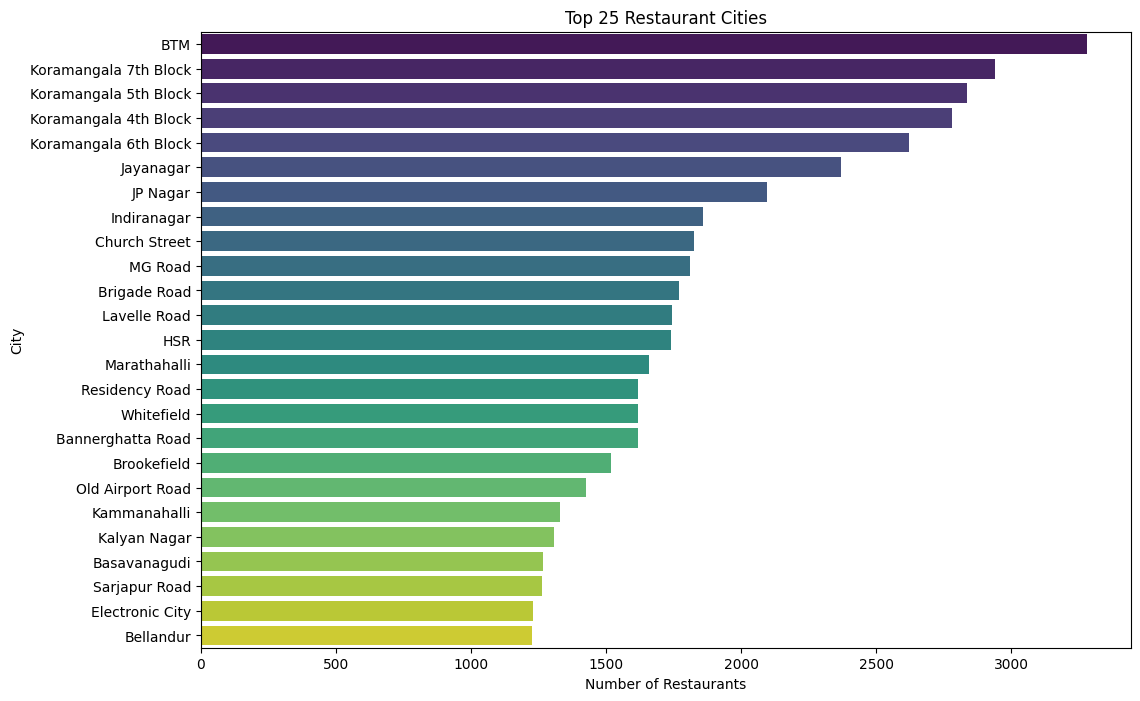

In [44]:

# Count the number of restaurants in each city
city_counts = zomato_data['restaurant_city'].value_counts().reset_index()
city_counts.columns = ['City', 'Count']

# Select the top 25 cities
top_cities = city_counts.head(25)

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='City', data=top_cities, palette='viridis')
plt.title('Top 25 Restaurant Cities')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.show()


**Insight : The data shows that BTM and various Koramangala blocks are among the top areas in Bangalore with the highest number of restaurants, indicating a concentration of culinary options in these neighborhoods. Jayanagar, JP Nagar, and Indiranagar are also prominent dining destinations, contributing to Bangalore's diverse and vibrant food scene.**

***Note: 'restaurant_location' and 'restaurant_city' columns seem to have similar kind of data.***

**1.4 Feature Engineering**

In [45]:
# Check uniqueness of values in 'restaurant_location' and 'restaurant_city'
unique_locations = zomato_data['restaurant_location'].nunique()
unique_cities = zomato_data['restaurant_city'].nunique()

print(f"Unique locations: {unique_locations}")
print(f"Unique cities: {unique_cities}")

# Check the first few values in each column for visual inspection
print("\nSample values in 'restaurant_location':")
print(zomato_data['restaurant_location'].sample(10))

print("\nSample values in 'restaurant_city':")
print(zomato_data['restaurant_city'].sample(10))


Unique locations: 93
Unique cities: 30

Sample values in 'restaurant_location':
5687         Commercial Street
36908    Koramangala 4th Block
28492    Koramangala 5th Block
37205                      BTM
660               Banashankari
43558        Commercial Street
34578                      BTM
47213            Seshadripuram
462               Basavanagudi
33865    Koramangala 6th Block
Name: restaurant_location, dtype: object

Sample values in 'restaurant_city':
1237         Bannerghatta Road
18691              Indiranagar
22843                 JP Nagar
21254                Jayanagar
30435    Koramangala 5th Block
30108    Koramangala 5th Block
28360    Koramangala 4th Block
31085    Koramangala 5th Block
44636             New BEL Road
34176    Koramangala 6th Block
Name: restaurant_city, dtype: object


Based on the provided information:

1. **Unique Locations:** There are 93 unique locations, indicating a relatively larger number of distinct areas where restaurants are located.

2. **Unique Cities:** There are 30 unique cities, suggesting a smaller set of cities.

**Insight:**
- If we want to do a more granular or specific geographical analysis, the "restaurant_location" column with 93 unique values might be more informative.
- If we want to do a broader city-wise analysis, the "restaurant_city" column with 30 unique values could be a good choice.

**So to avoid overburdening of ml model with data,in model building stage we will use only 'restaurant_location' column.(we are doing this under feature engineering.)**

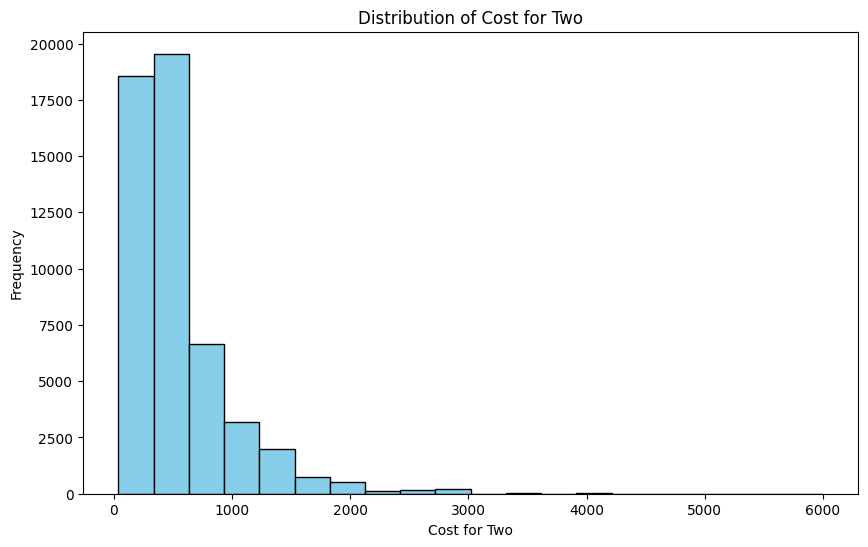

In [46]:
#Create histogram to visualize the distribution of 'cost_for_two'. This will provide an overview of how costs are distributed across different restaurants.
plt.figure(figsize=(10, 6))
plt.hist(zomato_data['cost_for_two'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Cost for Two')
plt.xlabel('Cost for Two')
plt.ylabel('Frequency')
plt.show()


**Insight : Cost distribution is right skewed,need to transform it into normal distribution for efficient model building.**

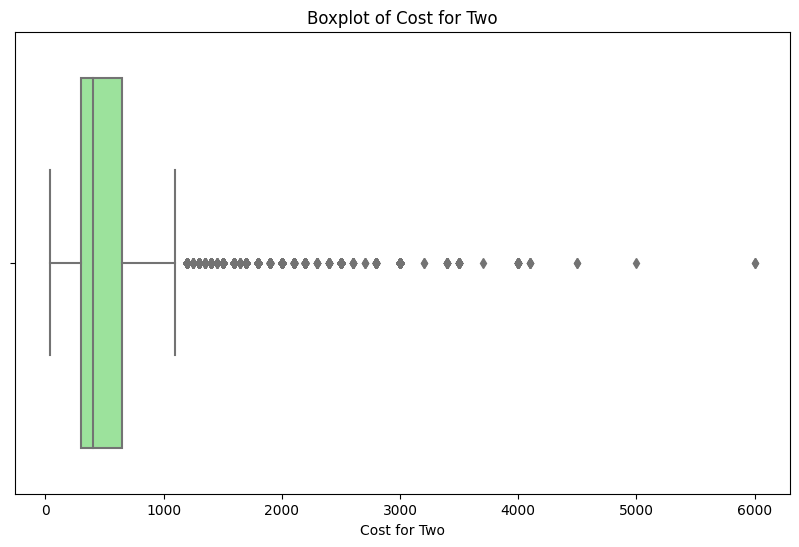

In [47]:
# Boxplot to identify the central tendency and spread of 'cost_for_two', including any potential outliers.

plt.figure(figsize=(10, 6))
sns.boxplot(x=zomato_data['cost_for_two'], color='lightgreen')
plt.title('Boxplot of Cost for Two')
plt.xlabel('Cost for Two')
plt.show()

Looking at box plot,it is seen that there are significant no. of outliers in cost_for_two column, there is need to handle them.

In [48]:
def calculate_outliers(column_name):

    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = zomato_data[column_name].quantile(0.25)
    Q3 = zomato_data[column_name].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define lower and upper bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers using the IQR method
    outliers = zomato_data[(zomato_data[column_name] < lower_bound) | (zomato_data[column_name] > upper_bound)]

    # Count the number of outliers
    num_outliers = len(outliers)

    print(f"Number of outliers in '{column_name}' using IQR: {num_outliers}")


In [49]:
column_name = 'cost_for_two'
calculate_outliers(column_name)

Number of outliers in 'cost_for_two' using IQR: 4764


In [50]:
# Descriptive Statistics:
# Calculate and visualize descriptive statistics such as mean, median, minimum, and maximum to provide a concise summary of the 'cost_for_two'.

mean_cost = zomato_data['cost_for_two'].mean()
median_cost = zomato_data['cost_for_two'].median()
min_cost = zomato_data['cost_for_two'].min()
max_cost = zomato_data['cost_for_two'].max()

print(f"Mean Cost for Two: {mean_cost}")
print(f"Median Cost for Two: {median_cost}")
print(f"Minimum Cost for Two: {min_cost}")
print(f"Maximum Cost for Two: {max_cost}")


Mean Cost for Two: 555.4315664479959
Median Cost for Two: 400.0
Minimum Cost for Two: 40.0
Maximum Cost for Two: 6000.0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



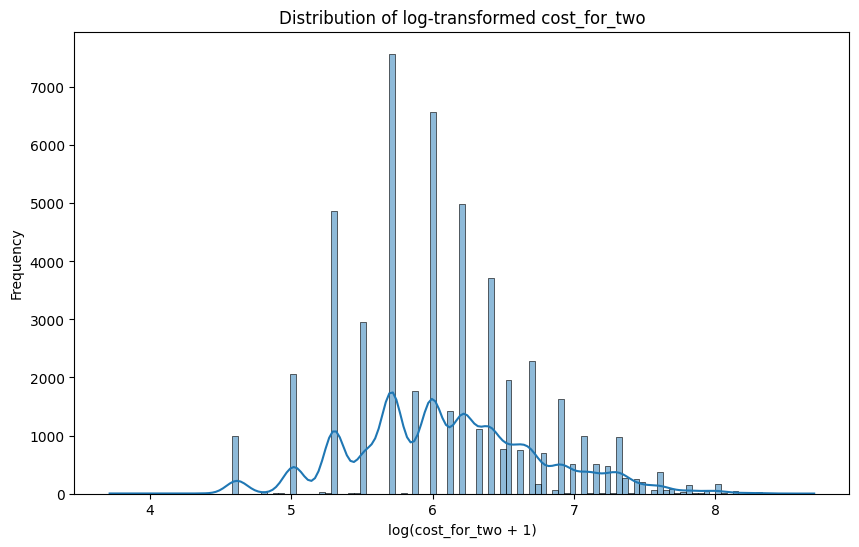

In [51]:
# Log transformation to reduce skewness
column_name='cost_for_two'
zomato_data[column_name] = np.log1p(zomato_data[column_name])

# Plot the distribution after log transformation
plt.figure(figsize=(10, 6))
sns.histplot(zomato_data[column_name], kde=True)
plt.title(f'Distribution of log-transformed {column_name}')
plt.xlabel(f'log({column_name} + 1)')
plt.ylabel('Frequency')
plt.show()

now data is kind of normally distributed in place right skewed distribution and log transformation will also take care of most of outliers

In [52]:
# Descriptive Statistics:
# Calculate and visualize descriptive statistics such as mean, median, minimum, and maximum to provide a concise summary of the 'cost_for_two'.

mean_cost = zomato_data['cost_for_two'].mean()
median_cost = zomato_data['cost_for_two'].median()
min_cost = zomato_data['cost_for_two'].min()
max_cost = zomato_data['cost_for_two'].max()

print(f"Mean Cost for Two: {mean_cost}")
print(f"Median Cost for Two: {median_cost}")
print(f"Minimum Cost for Two: {min_cost}")
print(f"Maximum Cost for Two: {max_cost}")

Mean Cost for Two: 6.096093592830367
Median Cost for Two: 5.993961427306569
Minimum Cost for Two: 3.713572066704308
Maximum Cost for Two: 8.699681400989514


In [53]:
column_name = 'cost_for_two'
calculate_outliers(column_name)

Number of outliers in 'cost_for_two' using IQR: 654


still some outliers are remaining ,for now leaving them as it is because no of outliers incresed when applied winsorizing and box cox ,if it going to affect model then after model testing we will handle it.

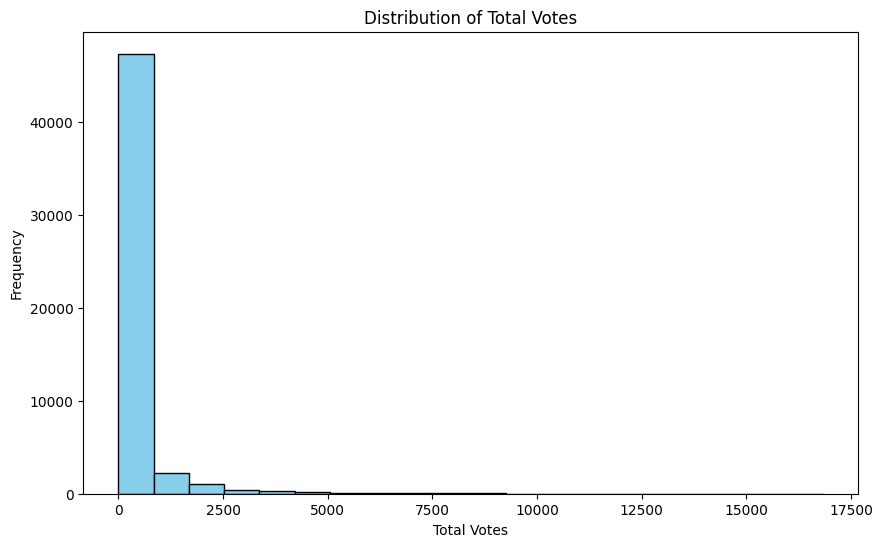

In [54]:
#Create histogram to visualize the distribution of 'cost_for_two'. This will provide an overview of how costs are distributed across different restaurants.
plt.figure(figsize=(10, 6))
plt.hist(zomato_data['total_votes'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Votes')
plt.xlabel('Total Votes')
plt.ylabel('Frequency')
plt.show()


Again total votes data is right skewed ,we need to handle it

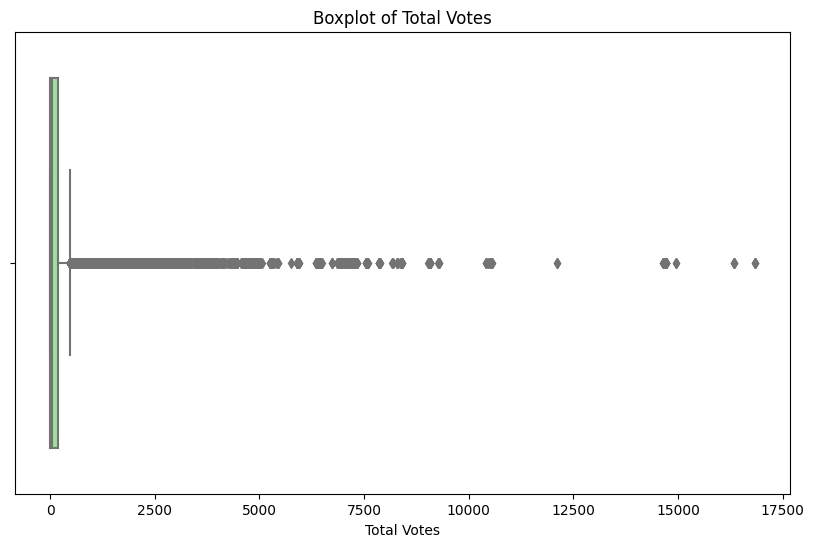

In [55]:
# Boxplot to identify the central tendency and spread of 'total_votes', including any potential outliers.

plt.figure(figsize=(10, 6))
sns.boxplot(x=zomato_data['total_votes'], color='lightgreen')
plt.title('Boxplot of Total Votes')
plt.xlabel('Total Votes')
plt.show()


In [56]:
calculate_outliers('total_votes')

Number of outliers in 'total_votes' using IQR: 6961


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



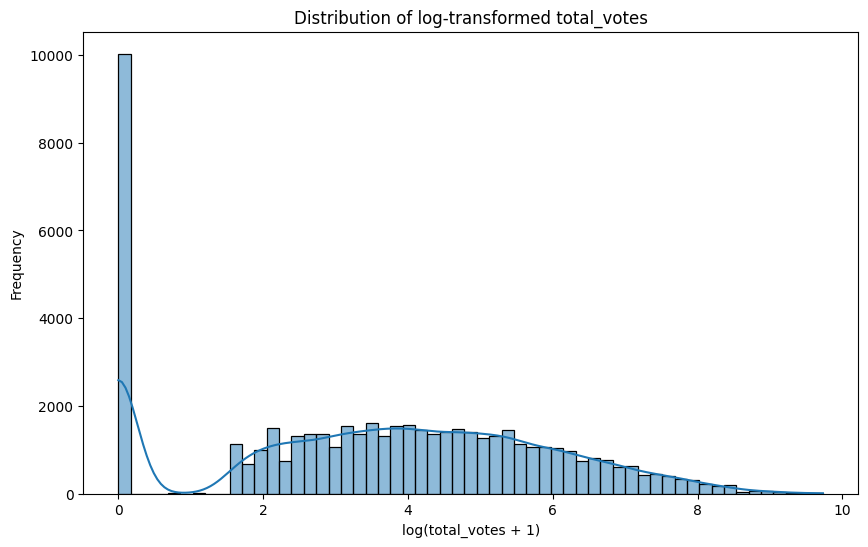

In [57]:
# Log transformation to reduce skewness
column_name='total_votes'
zomato_data[column_name] = np.log1p(zomato_data[column_name])

# Plot the distribution after log transformation
plt.figure(figsize=(10, 6))
sns.histplot(zomato_data[column_name], kde=True)
plt.title(f'Distribution of log-transformed {column_name}')
plt.xlabel(f'log({column_name} + 1)')
plt.ylabel('Frequency')
plt.show()

not perfect normal distribution but it has eliminated all outliers 

In [58]:
calculate_outliers('total_votes')

Number of outliers in 'total_votes' using IQR: 0


**Data preprocessing and feature extraction**

**The features we are going to use to build machine learning models are:**

online_orders

book_table

rating

total_votes

restaurant_location

restaurant_type cuisine_types

cost_for_two

restaurant_service

**> we will transform customer_review column into new column to new column  called customer sentiment using sentiment analysis.**

**Handle categorical data**

Use LabelEncoder from scikit-learn to convert categorical labels into numerical values.

In [59]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
zomato_data['online_orders'] = label_encoder.fit_transform(zomato_data['online_orders'])
zomato_data['book_table'] = label_encoder.fit_transform(zomato_data['book_table'])
zomato_data['restaurant_location'] = label_encoder.fit_transform(zomato_data['restaurant_location'])
zomato_data['restaurant_type'] = label_encoder.fit_transform(zomato_data['restaurant_type'])
zomato_data['restaurant_service'] = label_encoder.fit_transform(zomato_data['restaurant_service'])


In [60]:
for column in ['online_orders', 'book_table', 'restaurant_location', 'restaurant_type', 'restaurant_service']:
    print(f"Unique values in {column}: {zomato_data[column].unique()}")
    print(f"Encoded values in {column}: {label_encoder.classes_}")
    print()


Unique values in online_orders: [1 0]
Encoded values in online_orders: ['Buffet' 'Cafes' 'Delivery' 'Desserts' 'Dine-out' 'Drinks & nightlife'
 'Pubs and bars']

Unique values in book_table: [1 0]
Encoded values in book_table: ['Buffet' 'Cafes' 'Delivery' 'Desserts' 'Dine-out' 'Drinks & nightlife'
 'Pubs and bars']

Unique values in restaurant_location: [ 1  4 57 32 49 68 87 84 29 80 13 58  3  0 38  7 10 19 22 56 76 90 78 45
 48 71 47 31 44  6 89 17 62 27 41 20 65 52  8 51 12 83 70 79 28 81 15 66
 14 86 21 16 18 33 63 55 77 37 46 54 50 11 74  9 26 85 34 42 43 40 25 67
  2 61 59 24 36 60 30 69 82 35 23 39 75 72  5 92 88 53 91 73 64]
Encoded values in restaurant_location: ['Buffet' 'Cafes' 'Delivery' 'Desserts' 'Dine-out' 'Drinks & nightlife'
 'Pubs and bars']

Unique values in restaurant_type: [27 22 78 29 19 81 26 39 65 40  3 73  0 92 49 14 88  8 17 38 80 47  6 90
 59 58 82 16 91 76 28 42 79 46 69 60 10 53 20 93 48 87 67 57 74 33 61 56
 35 55 32 89  1 63 24 15 23 43 41 71  4 36 83  2  

In [61]:
zomato_data.head()

,restaurant_address,restaurant_name,online_orders,book_table,rating,total_votes,restaurant_location,restaurant_type,popular_dishes,cuisine_types,cost_for_two,customer_reviews,restaurant_service,restaurant_city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,6.654153,1,27,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",6.685861,"[('Rated 4.0', 'RATED\n A beautiful place to ...",0,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,6.669498,1,27,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",6.685861,"[('Rated 4.0', 'RATED\n Had been here for din...",0,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,6.823286,1,22,"Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",6.685861,"[('Rated 3.0', ""RATED\n Ambience is not that ...",0,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,4.488636,1,78,Masala Dosa,"South Indian, North Indian",5.707110,"[('Rated 4.0', ""RATED\n Great food and proper...",0,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,5.117994,4,27,"Panipuri, Gol Gappe","North Indian, Rajasthani",6.398595,"[('Rated 4.0', 'RATED\n Very good restaurant ...",0,Banashankari


In [62]:
zomato_data['customer_reviews'][0]

'[(\'Rated 4.0\', \'RATED\\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.\'), (\'Rated 4.0\', \'RATED\\n  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\\nCheers\'), (\'Rated 2.0\', \'RATED\\n  Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said this plac

In [63]:
zomato_data['customer_reviews'].describe()

count     51717
unique    22513
top          []
freq       7595
Name: customer_reviews, dtype: object

In [64]:
zomato_data['customer_reviews'].isna().sum()

0

In [65]:
zomato_data

,restaurant_address,restaurant_name,online_orders,book_table,rating,total_votes,restaurant_location,restaurant_type,popular_dishes,cuisine_types,cost_for_two,customer_reviews,restaurant_service,restaurant_city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.100000,6.654153,1,27,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",6.685861,"[('Rated 4.0', 'RATED\n A beautiful place to ...",0,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.100000,6.669498,1,27,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",6.685861,"[('Rated 4.0', 'RATED\n Had been here for din...",0,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.800000,6.823286,1,22,"Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",6.685861,"[('Rated 3.0', ""RATED\n Ambience is not that ...",0,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.700000,4.488636,1,78,Masala Dosa,"South Indian, North Indian",5.707110,"[('Rated 4.0', ""RATED\n Great food and proper...",0,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.800000,5.117994,4,27,"Panipuri, Gol Gappe","North Indian, Rajasthani",6.398595,"[('Rated 4.0', 'RATED\n Very good restaurant ...",0,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,0,0,3.600000,3.332205,89,8,Unknown,Continental,7.313887,"[('Rated 5.0', ""RATED\n Food and service are ...",6,Whitefield
51713,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,0,0,3.700449,0.000000,89,8,Unknown,Finger Food,6.398595,[],6,Whitefield
51714,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,0,0,3.700449,0.000000,89,8,Unknown,Finger Food,7.601402,[],6,Whitefield
51715,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,0,1,4.300000,5.468060,26,8,"Cocktails, Pizza, Buttermilk",Finger Food,7.824446,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",6,Whitefield


In [66]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

stop_words = set(stopwords.words('english'))
sia = SentimentIntensityAnalyzer()

def preprocess_reviews(review_str):
    # Convert the string representation of a list of tuples to an actual list of tuples
    reviews_list = eval(review_str) if review_str else None  # Return None for empty list

    # Check if reviews_list is None (empty list)
    if reviews_list is None:
        return None

    # Preprocess the first 5 reviews in the list
    preprocessed_reviews = []
    for i in range(min(5, len(reviews_list))):
        review_text = reviews_list[i][1] if reviews_list else ''  # Extracting the text part of the tuple
        # Lowercasing
        review_text = review_text.lower()
        # Tokenization
        words = word_tokenize(review_text)
        # Removing stopwords and non-alphabetic tokens
        words = [word for word in words if word.isalpha() and word not in stop_words]
        # Joining back to form a string
        preprocessed_reviews.append(' '.join(words))
    
    return preprocessed_reviews

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



In [67]:
# Example usage on a single review
sample_review =zomato_data['customer_reviews'][0]
preprocessed_review = preprocess_reviews(sample_review)
print(f"Original Review: {sample_review}")

Original Review: [('Rated 4.0', 'RATED\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.'), ('Rated 4.0', 'RATED\n  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\nCheers'), ('Rated 2.0', 'RATED\n  Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said this pla

In [68]:
preprocessed_review

['rated beautiful place dine interiors take back mughal era lightings went occasion christmas limited items available taste service compromised complaint breads could surely like come',
 'rated dinner family weekday restaurant completely empty ambience good good old hindi music seating arrangement good ordered masala papad panner baby corn starters lemon corrionder soup butter roti olive chilli paratha food fresh good service good good family hangout cheers',
 'rated restaurant near banashankari bda along office friends visited buffet unfortunately provide veg buffet inquiring said place mostly visited vegetarians anyways ordered ala carte items took ages come food ok definitely visiting anymore',
 'rated went weekend one us buffet two us took ala carte firstly ambience service place great buffet lot items good good pumpkin halwa intm dessert amazing must try kulchas great cheers',
 'rated best thing place ambiance second best thing yummy food try buffet buffet food disappointed us tes

In [69]:
# #Already used this code and saved that file 

# # Applyying preprocessing function
# zomato_data['preprocessed_reviews'] = zomato_data['customer_reviews'].apply(preprocess_reviews)


In [70]:
# #already runned

# # Save the DataFrame to a CSV file
# zomato_data.to_csv('/kaggle/working/zomato_data_preprocessed.csv', index=False)

### Main step to start working from here 

In [71]:
import pandas as pd 
zomato_data=pd.read_csv('/kaggle/input/zomato-preprocessed-data-with-combined-senti-score/zomato_data_preprocessed_with_sentiment_score.csv')

In [73]:
zomato_data['preprocessed_reviews']

0        ['rated beautiful place dine interiors take ba...
1        ['rated dinner family turned good choose suita...
2        ['rated ambience good enough pocket friendly c...
3        ['rated great food proper karnataka style full...
4        ['rated good restaurant neighbourhood buffet s...
                               ...                        
51712    ['rated food service incomparably excellent se...
51713                                                   []
51714                                                   []
51715    ['rated nice friendly place staff awesome ansu...
51716    ['rated great ambience looking nice good selec...
Name: preprocessed_reviews, Length: 51717, dtype: object

In [74]:
zomato_data['preprocessed_reviews'][0]

"['rated beautiful place dine interiors take back mughal era lightings went occasion christmas limited items available taste service compromised complaint breads could surely like come', 'rated dinner family weekday restaurant completely empty ambience good good old hindi music seating arrangement good ordered masala papad panner baby corn starters lemon corrionder soup butter roti olive chilli paratha food fresh good service good good family hangout cheers', 'rated restaurant near banashankari bda along office friends visited buffet unfortunately provide veg buffet inquiring said place mostly visited vegetarians anyways ordered ala carte items took ages come food ok definitely visiting anymore', 'rated went weekend one us buffet two us took ala carte firstly ambience service place great buffet lot items good good pumpkin halwa intm dessert amazing must try kulchas great cheers', 'rated best thing place ambiance second best thing yummy food try buffet buffet food disappointed us test q

In [75]:
zomato_data['preprocessed_reviews'].describe()

count     51717
unique    13787
top          []
freq       7595
Name: preprocessed_reviews, dtype: object

In [76]:
# def get_sentiment(review):
#     if not review:
#         return 'Neutral'
#     compound_score = sia.polarity_scores(review)['compound']
#     return 'Positive' if compound_score >= 0.05 else 'Negative' if compound_score <= -0.05 else 'Neutral'

# # Applying sentiment analysis to each review and handling empty lists
# zomato_data['customer_sentiment'] = zomato_data['preprocessed_reviews'].apply(lambda reviews: get_sentiment(reviews[0] if reviews else None))


In [77]:
# # Already runned 

# import nltk
# import pandas as pd
# from nltk.sentiment import SentimentIntensityAnalyzer

# nltk.download('vader_lexicon')

# # Assuming 'zomato_data' is the name of your DataFrame
# sia = SentimentIntensityAnalyzer()

# # Function to get sentiment scores
# def get_sentiment_score(text):
#     if text:
#         # Calculate sentiment score using SentimentIntensityAnalyzer
#         sentiment_score = sia.polarity_scores(text)['compound']
#         return sentiment_score
#     else:
#         return None


In [78]:
# #already runned 
# # Add sentiment_score column to the DataFrame
# zomato_data['sentiment_score'] = zomato_data['preprocessed_reviews'].apply(lambda reviews: [get_sentiment_score(review) for review in reviews] if reviews else None)

In [79]:
zomato_data

,restaurant_address,restaurant_name,online_orders,book_table,rating,total_votes,restaurant_location,restaurant_type,popular_dishes,cuisine_types,cost_for_two,customer_reviews,restaurant_service,restaurant_city,preprocessed_reviews,sentiment_score,combined_review_sentiment_score
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.100000,6.654153,1,27,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",6.685861,"[('Rated 4.0', 'RATED\n A beautiful place to ...",0,Banashankari,['rated beautiful place dine interiors take ba...,"[0.7351, 0.9694, 0.6808, 0.9678, 0.9485]",0.86032
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.100000,6.669498,1,27,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",6.685861,"[('Rated 4.0', 'RATED\n Had been here for din...",0,Banashankari,['rated dinner family turned good choose suita...,"[0.8655, 0.9294, 0.8591, 0.9545, 0.9652]",0.91474
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.800000,6.823286,1,22,"Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",6.685861,"[('Rated 3.0', ""RATED\n Ambience is not that ...",0,Banashankari,['rated ambience good enough pocket friendly c...,"[0.8979, 0.8519, 0.9659, 0.9217, -0.1531]",0.69686
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.700000,4.488636,1,78,Masala Dosa,"South Indian, North Indian",5.707110,"[('Rated 4.0', ""RATED\n Great food and proper...",0,Banashankari,['rated great food proper karnataka style full...,"[0.7553, 0.1531, 0.8689, -0.0665, 0.8126]",0.50468
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.800000,5.117994,4,27,"Panipuri, Gol Gappe","North Indian, Rajasthani",6.398595,"[('Rated 4.0', 'RATED\n Very good restaurant ...",0,Banashankari,['rated good restaurant neighbourhood buffet s...,"[0.7003, 0.967]",0.83365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,0,0,3.600000,3.332205,89,8,Unknown,Continental,7.313887,"[('Rated 5.0', ""RATED\n Food and service are ...",6,Whitefield,['rated food service incomparably excellent se...,"[0.9723, 0.8807, 0.6581, 0.6249, 0.9595]",0.81910
51713,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,0,0,3.700449,0.000000,89,8,Unknown,Finger Food,6.398595,[],6,Whitefield,[],NaN,0.00000
51714,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,0,0,3.700449,0.000000,89,8,Unknown,Finger Food,7.601402,[],6,Whitefield,[],NaN,0.00000
51715,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,0,1,4.300000,5.468060,26,8,"Cocktails, Pizza, Buttermilk",Finger Food,7.824446,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",6,Whitefield,['rated nice friendly place staff awesome ansu...,"[0.9531, 0.7506, 0.9325, 0.9922, 0.9432]",0.91432


In [80]:
zomato_data['sentiment_score']

0         [0.7351, 0.9694, 0.6808, 0.9678, 0.9485]
1         [0.8655, 0.9294, 0.8591, 0.9545, 0.9652]
2        [0.8979, 0.8519, 0.9659, 0.9217, -0.1531]
3        [0.7553, 0.1531, 0.8689, -0.0665, 0.8126]
4                                  [0.7003, 0.967]
                           ...                    
51712     [0.9723, 0.8807, 0.6581, 0.6249, 0.9595]
51713                                          NaN
51714                                          NaN
51715     [0.9531, 0.7506, 0.9325, 0.9922, 0.9432]
51716                             [0.9682, 0.9754]
Name: sentiment_score, Length: 51717, dtype: object

In [81]:
# # already used 
# # Function to get a single sentiment score for each row
# def get_combined_sentiment_score(scores):
#     if scores and all(score is not None and score != 'None' for score in scores):
#         # Calculate the average sentiment score
#         combined_score = sum(scores) / len(scores)
#         return combined_score
#     else:
#         # If the list is empty or contains 'None', return 0
#         return 0

In [82]:
# #Already used 
# # Apply the function to create a new column with combined sentiment scores
# zomato_data['combined_review_sentiment_score'] = zomato_data['sentiment_score'].apply(get_combined_sentiment_score)

In [83]:
zomato_data['combined_review_sentiment_score'].sample(15)

5281     0.680180
14486    0.000000
42661    0.665140
37797    0.960140
40615    0.165350
46792    0.934900
32543    0.925700
40895    0.944400
35065    0.682550
46437    0.854875
39112    0.664320
50146    0.922500
21751   -0.170460
45827    0.929120
9778     0.879000
Name: combined_review_sentiment_score, dtype: float64

In [84]:
zomato_data

,restaurant_address,restaurant_name,online_orders,book_table,rating,total_votes,restaurant_location,restaurant_type,popular_dishes,cuisine_types,cost_for_two,customer_reviews,restaurant_service,restaurant_city,preprocessed_reviews,sentiment_score,combined_review_sentiment_score
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.100000,6.654153,1,27,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",6.685861,"[('Rated 4.0', 'RATED\n A beautiful place to ...",0,Banashankari,['rated beautiful place dine interiors take ba...,"[0.7351, 0.9694, 0.6808, 0.9678, 0.9485]",0.86032
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.100000,6.669498,1,27,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",6.685861,"[('Rated 4.0', 'RATED\n Had been here for din...",0,Banashankari,['rated dinner family turned good choose suita...,"[0.8655, 0.9294, 0.8591, 0.9545, 0.9652]",0.91474
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.800000,6.823286,1,22,"Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",6.685861,"[('Rated 3.0', ""RATED\n Ambience is not that ...",0,Banashankari,['rated ambience good enough pocket friendly c...,"[0.8979, 0.8519, 0.9659, 0.9217, -0.1531]",0.69686
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.700000,4.488636,1,78,Masala Dosa,"South Indian, North Indian",5.707110,"[('Rated 4.0', ""RATED\n Great food and proper...",0,Banashankari,['rated great food proper karnataka style full...,"[0.7553, 0.1531, 0.8689, -0.0665, 0.8126]",0.50468
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.800000,5.117994,4,27,"Panipuri, Gol Gappe","North Indian, Rajasthani",6.398595,"[('Rated 4.0', 'RATED\n Very good restaurant ...",0,Banashankari,['rated good restaurant neighbourhood buffet s...,"[0.7003, 0.967]",0.83365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,0,0,3.600000,3.332205,89,8,Unknown,Continental,7.313887,"[('Rated 5.0', ""RATED\n Food and service are ...",6,Whitefield,['rated food service incomparably excellent se...,"[0.9723, 0.8807, 0.6581, 0.6249, 0.9595]",0.81910
51713,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,0,0,3.700449,0.000000,89,8,Unknown,Finger Food,6.398595,[],6,Whitefield,[],NaN,0.00000
51714,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,0,0,3.700449,0.000000,89,8,Unknown,Finger Food,7.601402,[],6,Whitefield,[],NaN,0.00000
51715,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,0,1,4.300000,5.468060,26,8,"Cocktails, Pizza, Buttermilk",Finger Food,7.824446,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",6,Whitefield,['rated nice friendly place staff awesome ansu...,"[0.9531, 0.7506, 0.9325, 0.9922, 0.9432]",0.91432


In [85]:
##  Main step

In [86]:
# #Already runned 
# # Save the DataFrame to a CSV file
# zomato_data.to_csv('/kaggle/working/zomato_data_preprocessed_with_sentiment_score.csv', index=False)

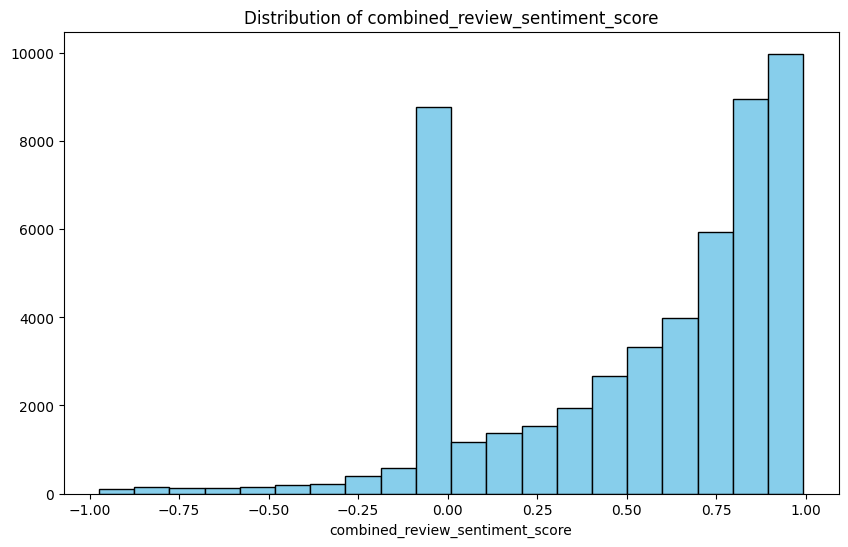

In [87]:
#Create histogram to visualize the distribution of 'combined_review_sentiment_score'. 
plt.figure(figsize=(10, 6))
plt.hist(zomato_data['combined_review_sentiment_score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of combined_review_sentiment_score')
plt.xlabel('combined_review_sentiment_score')
# plt.ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



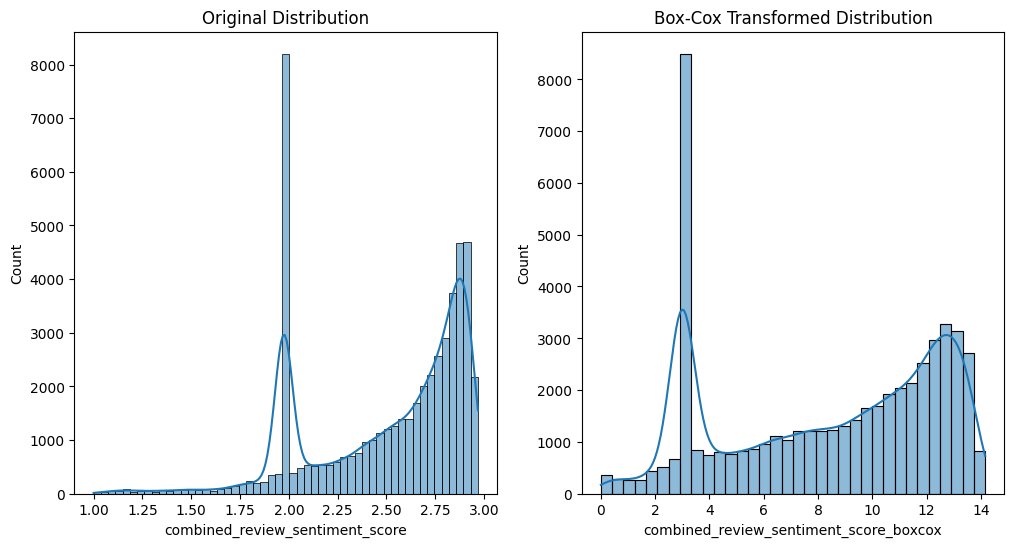

In [88]:
from scipy.stats import boxcox

# Ensure the data is positive (add a constant if needed)
zomato_data['combined_review_sentiment_score'] = zomato_data['combined_review_sentiment_score'] - zomato_data['combined_review_sentiment_score'].min() + 1

# Apply Box-Cox transformation
zomato_data['combined_review_sentiment_score_boxcox'], _ = boxcox(zomato_data['combined_review_sentiment_score'])

# Visualize the transformed distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(zomato_data['combined_review_sentiment_score'], kde=True)
plt.title('Original Distribution')

plt.subplot(1, 2, 2)
sns.histplot(zomato_data['combined_review_sentiment_score_boxcox'], kde=True)
plt.title('Box-Cox Transformed Distribution')

plt.show()


In [89]:
calculate_outliers('combined_review_sentiment_score_boxcox')

Number of outliers in 'combined_review_sentiment_score_boxcox' using IQR: 0


In [90]:
#converting cuisine type categorical feaure to numerical feature 

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

zomato_data.cuisine_types = le.fit_transform(zomato_data.cuisine_types)


In [91]:
zomato_data

,restaurant_address,restaurant_name,online_orders,book_table,rating,total_votes,restaurant_location,restaurant_type,popular_dishes,cuisine_types,cost_for_two,customer_reviews,restaurant_service,restaurant_city,preprocessed_reviews,sentiment_score,combined_review_sentiment_score,combined_review_sentiment_score_boxcox
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.100000,6.654153,1,27,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",2159,6.685861,"[('Rated 4.0', 'RATED\n A beautiful place to ...",0,Banashankari,['rated beautiful place dine interiors take ba...,"[0.7351, 0.9694, 0.6808, 0.9678, 0.9485]",2.83472,11.929684
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.100000,6.669498,1,27,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",952,6.685861,"[('Rated 4.0', 'RATED\n Had been here for din...",0,Banashankari,['rated dinner family turned good choose suita...,"[0.8655, 0.9294, 0.8591, 0.9545, 0.9652]",2.88914,12.804710
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.800000,6.823286,1,22,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",766,6.685861,"[('Rated 3.0', ""RATED\n Ambience is not that ...",0,Banashankari,['rated ambience good enough pocket friendly c...,"[0.8979, 0.8519, 0.9659, 0.9217, -0.1531]",2.67126,9.556113
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.700000,4.488636,1,78,Masala Dosa,2555,5.707110,"[('Rated 4.0', ""RATED\n Great food and proper...",0,Banashankari,['rated great food proper karnataka style full...,"[0.7553, 0.1531, 0.8689, -0.0665, 0.8126]",2.47908,7.215870
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.800000,5.117994,4,27,"Panipuri, Gol Gappe",2188,6.398595,"[('Rated 4.0', 'RATED\n Very good restaurant ...",0,Banashankari,['rated good restaurant neighbourhood buffet s...,"[0.7003, 0.967]",2.80805,11.516735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,0,0,3.600000,3.332205,89,8,Unknown,1009,7.313887,"[('Rated 5.0', ""RATED\n Food and service are ...",6,Whitefield,['rated food service incomparably excellent se...,"[0.9723, 0.8807, 0.6581, 0.6249, 0.9595]",2.79350,11.295772
51713,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,0,0,3.700449,0.000000,89,8,Unknown,1391,6.398595,[],6,Whitefield,[],NaN,1.97440,2.995286
51714,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,0,0,3.700449,0.000000,89,8,Unknown,1391,7.601402,[],6,Whitefield,[],NaN,1.97440,2.995286
51715,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,0,1,4.300000,5.468060,26,8,"Cocktails, Pizza, Buttermilk",1391,7.824446,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",6,Whitefield,['rated nice friendly place staff awesome ansu...,"[0.9531, 0.7506, 0.9325, 0.9922, 0.9432]",2.88872,12.797787


### 2.Model Building

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


# Feature selection
selected_features = ['online_orders', 'book_table', 'total_votes','restaurant_location','restaurant_type','cuisine_types','cost_for_two','restaurant_service','combined_review_sentiment_score_boxcox']

# Data 
X = zomato_data[selected_features]
y = zomato_data['rating']


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [93]:
X_features = ['online_orders','rating','book_table', 'total_votes','restaurant_location','restaurant_type','cuisine_types','cost_for_two','restaurant_service','combined_review_sentiment_score_boxcox']


# Create a new DataFrame with only the selected features
X_df = zomato_data[X_features].copy()

# Display the new DataFrame
print(X_df.head())



   online_orders  rating  book_table  total_votes  restaurant_location  \
0              1     4.1           1     6.654153                    1   
1              1     4.1           0     6.669498                    1   
2              1     3.8           0     6.823286                    1   
3              0     3.7           0     4.488636                    1   
4              0     3.8           0     5.117994                    4   

   restaurant_type  cuisine_types  cost_for_two  restaurant_service  \
0               27           2159      6.685861                   0   
1               27            952      6.685861                   0   
2               22            766      6.685861                   0   
3               78           2555      5.707110                   0   
4               27           2188      6.398595                   0   

   combined_review_sentiment_score_boxcox  
0                               11.929684  
1                               12.80471

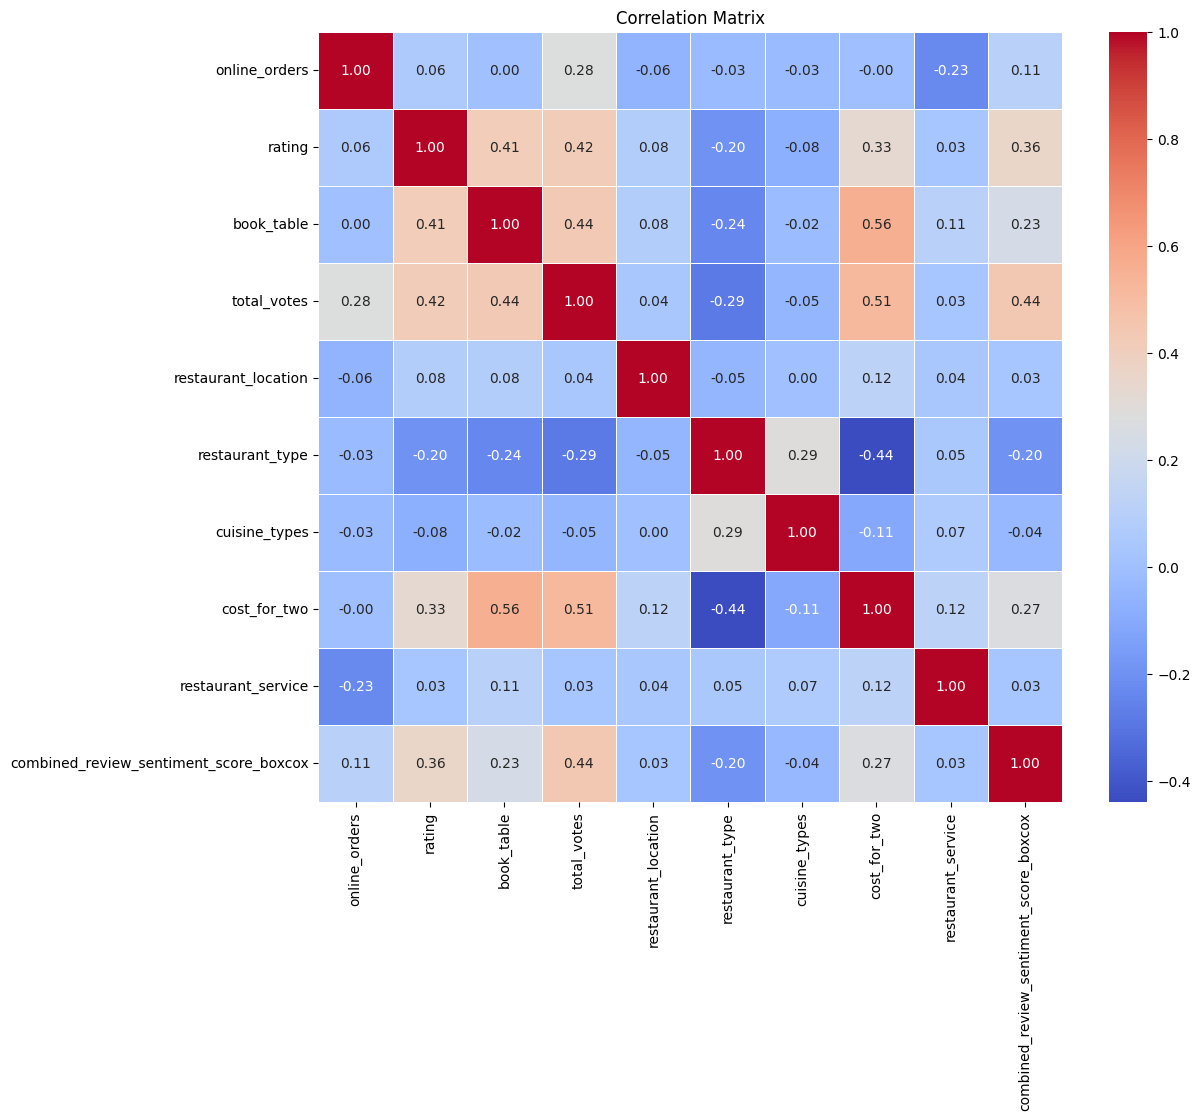

In [94]:

# Assuming 'zomato_data' is the name of your DataFrame
correlation_matrix = X_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.title('Correlation Matrix')
plt.show()


In [95]:
# Model selection and training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [96]:
# Model evaluation
y_pred = model.predict(X_test)

In [97]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5

print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 0.10325547146464877


In [98]:
# Evaluate the model performance
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.9316647066807365


In [99]:

# Feature importance analysis
feature_importances = model.feature_importances_
print("Feature Importances:")
for feature, importance in zip(selected_features, feature_importances):
    print(f"{feature}: {importance}")

Feature Importances:
online_orders: 0.012392877301347284
book_table: 0.011462931936042167
total_votes: 0.4947571307491906
restaurant_location: 0.07523130732540662
restaurant_type: 0.04349068629461179
cuisine_types: 0.10372177370272245
cost_for_two: 0.06707235729616211
restaurant_service: 0.0045999936284796625
combined_review_sentiment_score_boxcox: 0.1872709417660374


In [100]:
# We have all our features in X_df 
X_df

,online_orders,rating,book_table,total_votes,restaurant_location,restaurant_type,cuisine_types,cost_for_two,restaurant_service,combined_review_sentiment_score_boxcox
0,1,4.100000,1,6.654153,1,27,2159,6.685861,0,11.929684
1,1,4.100000,0,6.669498,1,27,952,6.685861,0,12.804710
2,1,3.800000,0,6.823286,1,22,766,6.685861,0,9.556113
3,0,3.700000,0,4.488636,1,78,2555,5.707110,0,7.215870
4,0,3.800000,0,5.117994,4,27,2188,6.398595,0,11.516735
...,...,...,...,...,...,...,...,...,...,...
51712,0,3.600000,0,3.332205,89,8,1009,7.313887,6,11.295772
51713,0,3.700449,0,0.000000,89,8,1391,6.398595,6,2.995286
51714,0,3.700449,0,0.000000,89,8,1391,7.601402,6,2.995286
51715,0,4.300000,1,5.468060,26,8,1391,7.824446,6,12.797787


In [101]:
# Sample  testing  51714 has rating 3.700449
# Model evaluation
y_pred = model.predict([[0,0,0.000000,89,8,1391,7.601402,6,2.995286]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



In [102]:
y_pred

array([3.70444432])

pretty good actual rating was 3.700449 but model predicted 3.70444432

In [101]:
# Already runned 
# import joblib
# import os

# # Assuming 'model' is the name of your trained model
# model_filename = '/kaggle/working/random_forest_regressor.joblib'

# # Save the model to the specified path
# joblib.dump(model, model_filename)

# print(f"Model saved as {model_filename}.")


In [103]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = linear_model.predict(X_test)


In [104]:
# Evaluate the model performance
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred_linear)
print(r2)

0.28092930552545536


linear regression model is not performing well,we will try to build it on scaled data .

In [105]:
# Sample  testing  51714 has rating 3.700449
# Model evaluation
y_pred = linear_model.predict([[0,0,0.000000,89,8,1391,7.601402,6,2.995286]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [106]:
y_pred

array([3.46817325])

its not accurate 3.46817325 but closed to 3.700449

In [107]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [108]:
X_train_scaled

array([[ 0.83553586, -0.37584727, -1.54307542, ...,  0.46524635,
        -0.70978458,  1.04792738],
       [-1.19683672, -0.37584727, -0.64369099, ...,  0.18692224,
        -0.70978458,  0.61883558],
       [-1.19683672, -0.37584727, -0.08667794, ...,  0.18692224,
        -0.70978458, -0.98304161],
       ...,
       [ 0.83553586,  2.6606552 ,  1.10687199, ...,  1.2454579 ,
        -0.70978458, -0.09049722],
       [-1.19683672, -0.37584727, -1.54307542, ...,  0.18692224,
         1.91858681,  1.30286078],
       [-1.19683672,  2.6606552 ,  0.69075899, ...,  1.86504548,
        -2.46203217,  1.27965722]])

In [109]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
linear_model2 = LinearRegression()

# Train the model
linear_model2.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_linear2 = linear_model2.predict(X_test_scaled)

In [110]:
# Evaluate the model performance
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred_linear2)
print(r2)

0.2809293055254496


we will use tree based and ensemble learning to build models as classical technique in not performing so well

In [111]:
# from sklearn.svm import SVR
# from sklearn.preprocessing import StandardScaler


# # Create an SVR model
# svr_model = SVR(kernel='linear')  # You can explore different kernels

# # Train the model
# svr_model.fit(X_train_scaled, y_train)

# # Predict on the test set
# y_pred_svr = svr_model.predict(X_test_scaled)


In [112]:
# # Evaluate the model performance
# from sklearn.metrics import r2_score
# r2 = r2_score(y_test,y_pred_svr)
# print(r2)

In [113]:
from sklearn.ensemble import ExtraTreesRegressor

# Create an Extra Trees Regressor model
extra_trees_model = ExtraTreesRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators

# Train the model
extra_trees_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_extra_trees = extra_trees_model.predict(X_test_scaled)


In [114]:
# Evaluate the model performance
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred_extra_trees)
print(r2)

0.9420079114733773


### Building model on only 8 features excluding combined_review_sentiment_score 

because we are going to build a webapp which is taking input from user and the feature combined_review_sentiment_score is genereted by ourselves artificialy to do experimenting with model building.

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


# Feature selection
selected_features2 = ['online_orders', 'book_table', 'total_votes','restaurant_location','restaurant_type','cuisine_types','cost_for_two','restaurant_service']

# Data 
X2 = zomato_data[selected_features2]
y2 = zomato_data['rating']


# Train-test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)



In [116]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train2)
X_test_scaled2 = scaler.transform(X_test2)

In [117]:
from sklearn.ensemble import ExtraTreesRegressor

# Create an Extra Trees Regressor model
extra_trees_model2 = ExtraTreesRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators

# Train the model
extra_trees_model2.fit(X_train_scaled2, y_train2)

# Predict on the test set
y_pred_extra_trees = extra_trees_model2.predict(X_test_scaled2)

In [118]:
# Evaluate the model performance
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred_extra_trees)
print(r2)

0.942682421574348


In [119]:
import joblib

# Replace 'your_model_filename.joblib' with your desired filename
model_filename = '/kaggle/working/extra_trees_regressor2.joblib'
joblib.dump(extra_trees_model2, model_filename)


['/kaggle/working/extra_trees_regressor2.joblib']

In [120]:
# from sklearn.ensemble import StackingRegressor
# from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.svm import SVR

# # Base models
# base_models = [
#     ('random_forest', RandomForestRegressor(n_estimators=100, random_state=42)),
#     ('svr', SVR(kernel='linear'))
#     # Add more base models as needed
# ]

# # Meta-model
# meta_model = LinearRegression()

# # Create a Stacking Regressor model
# stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# # Train the model
# stacking_model.fit(X_train_scaled, y_train)

# # Predict on the test set
# y_pred_stacking = stacking_model.predict(X_test_scaled)


In [121]:
# # Evaluate the model performance
# from sklearn.metrics import r2_score
# r2 = r2_score(y_test,y_pred_stacking)
# print(r2)

In [122]:
# from sklearn.ensemble import StackingRegressor
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# from sklearn.svm import SVR
# from sklearn.model_selection import cross_val_predict
# from sklearn.metrics import r2_score
# from sklearn.preprocessing import StandardScaler

# # Base models
# base_models = [
#     ('random_forest', RandomForestRegressor(n_estimators=100, random_state=42)),
#     ('xgboost', XGBRegressor(random_state=42)),
#     ('lightgbm', LGBMRegressor(random_state=42)),
#     ('svr', SVR(kernel='linear'))
#     # Add more base models as needed
# ]

# # Meta-model (Random Forest as an example)
# meta_model = RandomForestRegressor(n_estimators=100, random_state=42)

# # Create a Stacking Regressor model
# stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5)


In [123]:
# # Train the stacking model
# stacking_model.fit(X_train_scaled, y_train)

# # Predict on the test set
# y_pred_stacking = cross_val_predict(stacking_model, X_test_scaled, y_test, cv=5)


In [124]:
# # Evaluate the model performance
# r2_stacking = r2_score(y_test, y_pred_stacking)
# print(f"R-squared for Stacking: {r2_stacking}")


**stacking also not giving up to mark result so we will continue with extra tree regressor model which has r2 score aroung 0.94**

# Analysis and Conclusion


1. **Restaurant Popularity by Outlets:**
   - Cafe Coffee Day, Onesta, and Just Bake emerge as the most popular restaurants based on the number of outlets. This indicates their widespread presence and potentially high customer reach.

2. **Top-Rated Restaurant Chains:**
   - Belgian Waffle Factory, SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ, AB's - Absolute Barbecues, Punjab Grill, Byg Brewski Brewing Company, and Asia Kitchen By Mainland China stand out as the top 6 restaurant chains in terms of ratings. These establishments have garnered positive reviews and high ratings from customers.

3. **Popular Restaurant Chains by Votes:**
   - Byg Brewski Brewing Company, Toit, and Truffles are the top 3 restaurant chains that have gained popularity based on votes. This suggests a strong and engaged customer base for these establishments.

4. **Facilities Offered by Restaurants:**
   - A majority of restaurants (around 45,000) do not provide a book table facility, while a substantial number (around 31,000) offer online ordering services. This indicates that online orders are more prevalent than table booking services.

5. **Prominent Restaurant Locations:**
   - BTM is the most prominent location, followed by HSR and Koramangala 5th Block, in terms of the number of restaurants. This information can be valuable for individuals seeking diverse dining options in these areas.

6. **Top 10 Popular Dishes:**
   - The top 10 popular dishes include Biryani, Chicken Biryani, Friendly Staff, Waffles, Paratha, Masala Dosa, Coffee, Rooftop Ambience, and Pizza. This diverse list suggests a varied preference for both cuisine and ambiance among customers.

7. **Cuisine Preferences:**
   - North Indian cuisine holds the highest count among popular cuisine types, followed by combinations like North Indian with Chinese and South Indian. This indicates a strong inclination towards diverse Indian flavors among customers.

8. **Service Offerings:**
   - Delivery and dine-out services are prevalent among restaurants, with a significant number also offering desserts. Cafes and options for drinks & nightlife are noteworthy, while buffet and pubs/bars services are comparatively less common.

9. **Insights for Model Building:**
   - Classical techniques like linear regression and stacking did not perform well. The chosen model for prediction is the Extra Tree Regressor, which yielded a high R2 score of around 0.94. This model outperformed others and is recommended for further predictions.

In conclusion, the analysis provides valuable insights into restaurant popularity, customer preferences, and the effectiveness of different models for prediction. These findings can guide decision-making for individuals in the food industry and data scientists exploring predictive modeling in the restaurant domain.